In [2]:
LOW_CUTOFF_FREQUENCY = 10
HIGH_CUTOFF_FREQUENCY = 200
ORIGINAL_FREQUENCY = 2000
TARGET_FREQUENCY = 400
SEGMENT_DURATION_SECONDS = 4

In [3]:
DATA_BASE_PATH = "/Users/mirzasharmin/Downloads/Star copy 2"

In [4]:
from src.read_data import read_all_data

patient_dfs, sinus_dfs = read_all_data(DATA_BASE_PATH)

In [5]:
patient_df = patient_dfs[list(patient_dfs.keys())[2]]
sinus_df = sinus_dfs[list(sinus_dfs.keys())[2]]

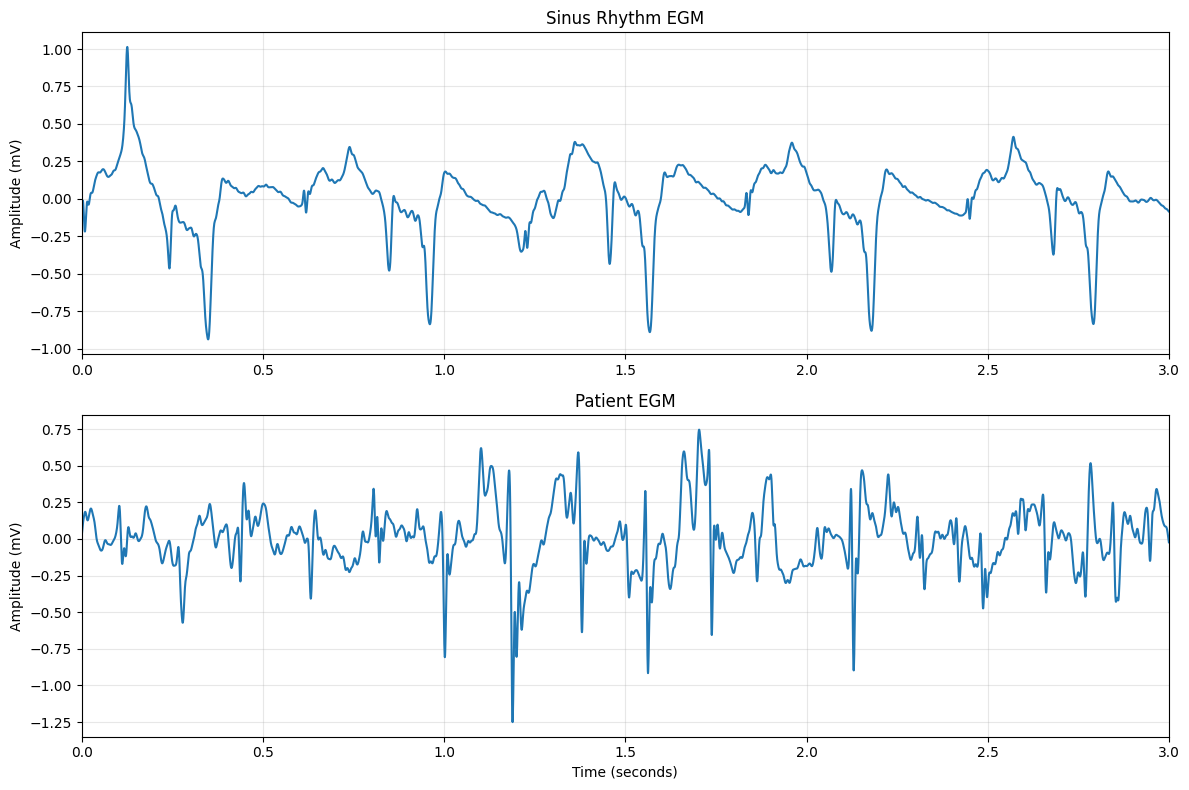

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Create time axis for 6000 samples at 2kHz sampling rate
sampling_freq = 2000  # Hz
n_samples = 6000
time_axis = np.arange(n_samples) / sampling_freq  # Convert samples to seconds

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot sinus data
ax1.plot(time_axis, sinus_df['c1'][:6000])
ax1.set_title('Sinus Rhythm EGM')
ax1.set_ylabel('Amplitude (mV)')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(np.arange(0, 3.5, 0.5))  # 0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0
ax1.set_xlim(0, 3)

# Plot patient data
ax2.plot(time_axis, patient_df['c1'][:6000])
ax2.set_title('Patient EGM')
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel('Amplitude (mV)')
ax2.grid(True, alpha=0.3)
ax2.set_xticks(np.arange(0, 3.5, 0.5))  # 0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0
ax2.set_xlim(0, 3)

plt.tight_layout()
plt.savefig('figures/egm_waveform_plots.png')
plt.show()

In [7]:
from src.preprocess_data import filter_all_dataframes

filtered_patient_dfs = filter_all_dataframes(patient_dfs, LOW_CUTOFF_FREQUENCY, HIGH_CUTOFF_FREQUENCY)
filtered_sinus_dfs = filter_all_dataframes(sinus_dfs, LOW_CUTOFF_FREQUENCY, HIGH_CUTOFF_FREQUENCY)

In [8]:
from src.preprocess_data import downsample_data, segment_data
from src.preprocess_data import normalize_data

only_downsampled_patient_dfs = downsample_data(patient_dfs, TARGET_FREQUENCY)
only_downsampled_sinus_dfs = downsample_data(sinus_dfs, TARGET_FREQUENCY)

only_normalized_patient_dfs = normalize_data(only_downsampled_patient_dfs)
only_normalized_sinus_dfs = normalize_data(only_downsampled_sinus_dfs)

original_patient_segmented_arrays = segment_data(only_normalized_patient_dfs, segment_duration_sec=SEGMENT_DURATION_SECONDS)
original_sinus_segmented_arrays = segment_data(only_normalized_sinus_dfs, segment_duration_sec=SEGMENT_DURATION_SECONDS)

Segmenting into 4-second segments (1600 samples each)...
  /Users/mirzasharmin/Downloads/Star copy 2/Patient 1- study date 21:01:2021/2022_07_11_21_30_06: 58 segments created
  /Users/mirzasharmin/Downloads/Star copy 2/Patient 1- study date 21:01:2021/2022_07_11_21_31_11: 53 segments created
  /Users/mirzasharmin/Downloads/Star copy 2/Patient 1- study date 21:01:2021/2022_07_11_21_32_46: 41 segments created
  /Users/mirzasharmin/Downloads/Star copy 2/Patient 1- study date 21:01:2021/2022_07_11_21_33_51: 52 segments created
  /Users/mirzasharmin/Downloads/Star copy 2/Patient 1- study date 21:01:2021/2022_07_11_21_34_38: 49 segments created
  /Users/mirzasharmin/Downloads/Star copy 2/Patient 1- study date 21:01:2021/2022_07_11_21_35_27: 51 segments created
  /Users/mirzasharmin/Downloads/Star copy 2/Patient 1- study date 21:01:2021/2022_07_11_21_36_35: 50 segments created
  /Users/mirzasharmin/Downloads/Star copy 2/Patient 10- study date 24:05:2021/2022_07_13_13_31_54: 44 segments create

In [9]:
filtered_and_downsampled_patient_dfs = downsample_data(filtered_patient_dfs, TARGET_FREQUENCY)
filtered_and_downsampled_sinus_dfs = downsample_data(filtered_sinus_dfs, TARGET_FREQUENCY)

filtered_and_normalized_patient_dfs = normalize_data(filtered_and_downsampled_patient_dfs)
filtered_and_normalized_sinus_dfs = normalize_data(filtered_and_downsampled_sinus_dfs)

filtered_patient_segmented_arrays = segment_data(filtered_and_normalized_patient_dfs, segment_duration_sec=SEGMENT_DURATION_SECONDS)
filtered_sinus_segmented_arrays = segment_data(filtered_and_normalized_sinus_dfs, segment_duration_sec=SEGMENT_DURATION_SECONDS)

Segmenting into 4-second segments (1600 samples each)...
  /Users/mirzasharmin/Downloads/Star copy 2/Patient 1- study date 21:01:2021/2022_07_11_21_30_06: 58 segments created
  /Users/mirzasharmin/Downloads/Star copy 2/Patient 1- study date 21:01:2021/2022_07_11_21_31_11: 53 segments created
  /Users/mirzasharmin/Downloads/Star copy 2/Patient 1- study date 21:01:2021/2022_07_11_21_32_46: 41 segments created
  /Users/mirzasharmin/Downloads/Star copy 2/Patient 1- study date 21:01:2021/2022_07_11_21_33_51: 52 segments created
  /Users/mirzasharmin/Downloads/Star copy 2/Patient 1- study date 21:01:2021/2022_07_11_21_34_38: 49 segments created
  /Users/mirzasharmin/Downloads/Star copy 2/Patient 1- study date 21:01:2021/2022_07_11_21_35_27: 51 segments created
  /Users/mirzasharmin/Downloads/Star copy 2/Patient 1- study date 21:01:2021/2022_07_11_21_36_35: 50 segments created
  /Users/mirzasharmin/Downloads/Star copy 2/Patient 10- study date 24:05:2021/2022_07_13_13_31_54: 44 segments create

In [10]:
patient_key = list(original_patient_segmented_arrays.keys())[0]
sinus_key = list(original_sinus_segmented_arrays.keys())[0]

original_patient_segment = original_patient_segmented_arrays[patient_key][0]
original_sinus_segment = original_sinus_segmented_arrays[sinus_key][0]

filtered_patient_segment = filtered_patient_segmented_arrays[patient_key][0]
filtered_sinus_segment = filtered_sinus_segmented_arrays[sinus_key][0]

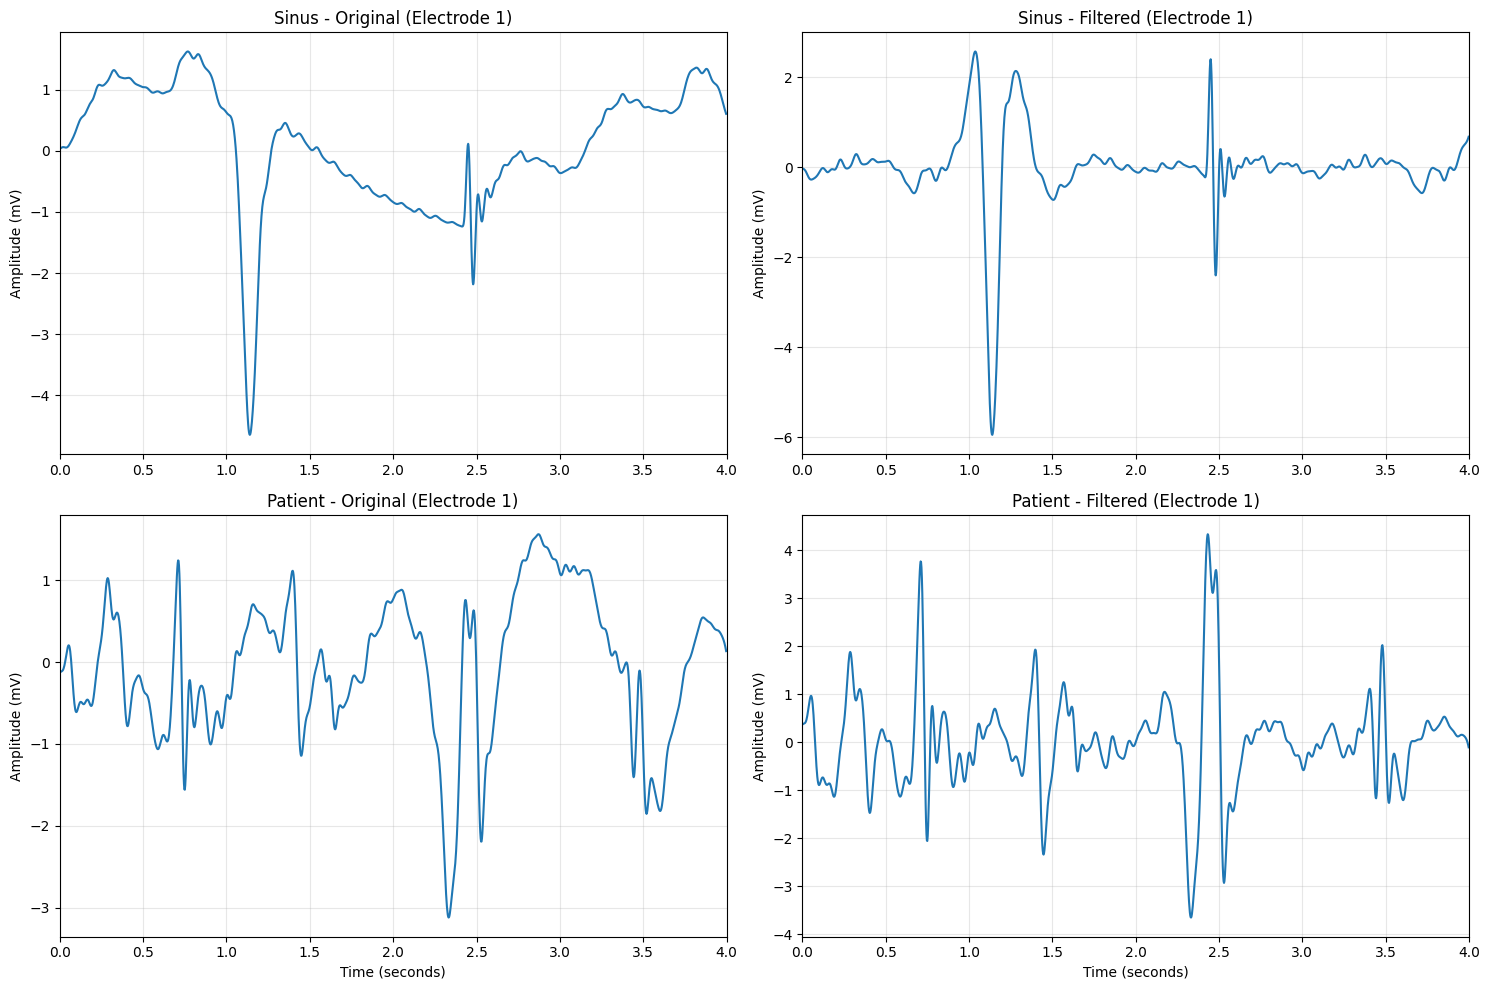

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Create time axis for 4-second segments at 400Hz sampling rate
sampling_freq = 400  # Hz (downsampled)
segment_length = original_sinus_segment.shape[0]  # Should be 1600 samples for 4 seconds
time_axis = np.arange(segment_length) / sampling_freq  # Convert samples to seconds

# Create subplots - 2 rows, 2 columns
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Top row - Sinus data
# Top left - Sinus Original
axes[0, 0].plot(time_axis, original_sinus_segment[:, 0])
axes[0, 0].set_title('Sinus - Original (Electrode 1)')
axes[0, 0].set_ylabel('Amplitude (mV)')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xticks(np.arange(0, 4.5, 0.5))
axes[0, 0].set_xlim(0, 4)

# Top right - Sinus Filtered
axes[0, 1].plot(time_axis, filtered_sinus_segment[:, 0])
axes[0, 1].set_title('Sinus - Filtered (Electrode 1)')
axes[0, 1].set_ylabel('Amplitude (mV)')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xticks(np.arange(0, 4.5, 0.5))
axes[0, 1].set_xlim(0, 4)

# Bottom row - Patient data
# Bottom left - Patient Original
axes[1, 0].plot(time_axis, original_patient_segment[:, 0])
axes[1, 0].set_title('Patient - Original (Electrode 1)')
axes[1, 0].set_xlabel('Time (seconds)')
axes[1, 0].set_ylabel('Amplitude (mV)')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xticks(np.arange(0, 4.5, 0.5))
axes[1, 0].set_xlim(0, 4)

# Bottom right - Patient Filtered
axes[1, 1].plot(time_axis, filtered_patient_segment[:, 0])
axes[1, 1].set_title('Patient - Filtered (Electrode 1)')
axes[1, 1].set_xlabel('Time (seconds)')
axes[1, 1].set_ylabel('Amplitude (mV)')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xticks(np.arange(0, 4.5, 0.5))
axes[1, 1].set_xlim(0, 4)

plt.tight_layout()
plt.savefig('figures/segments_sinus_and_patient_original_vs_filtered.png')
plt.show()

In [12]:
patient_seconds = {key: len(patient_df) // 2000 for key, patient_df in patient_dfs.items()}
sinus_seconds = {key: len(sinus_df) // 2000 for key, sinus_df in sinus_dfs.items()}

In [13]:
sum(patient_seconds.values()), sum(sinus_seconds.values())

(1421, 243)

In [14]:
sum(patient_seconds.values()) / len(patient_seconds), sum(sinus_seconds.values()) / len(sinus_seconds)

(36.43589743589744, 48.6)

In [15]:
len(patient_dfs), len(sinus_dfs)

(39, 5)

In [16]:
all_seconds = list(patient_seconds.values()) + list(sinus_seconds.values())

In [17]:
np.mean(all_seconds), np.std(all_seconds)

(np.float64(37.81818181818182), np.float64(7.471986249478561))

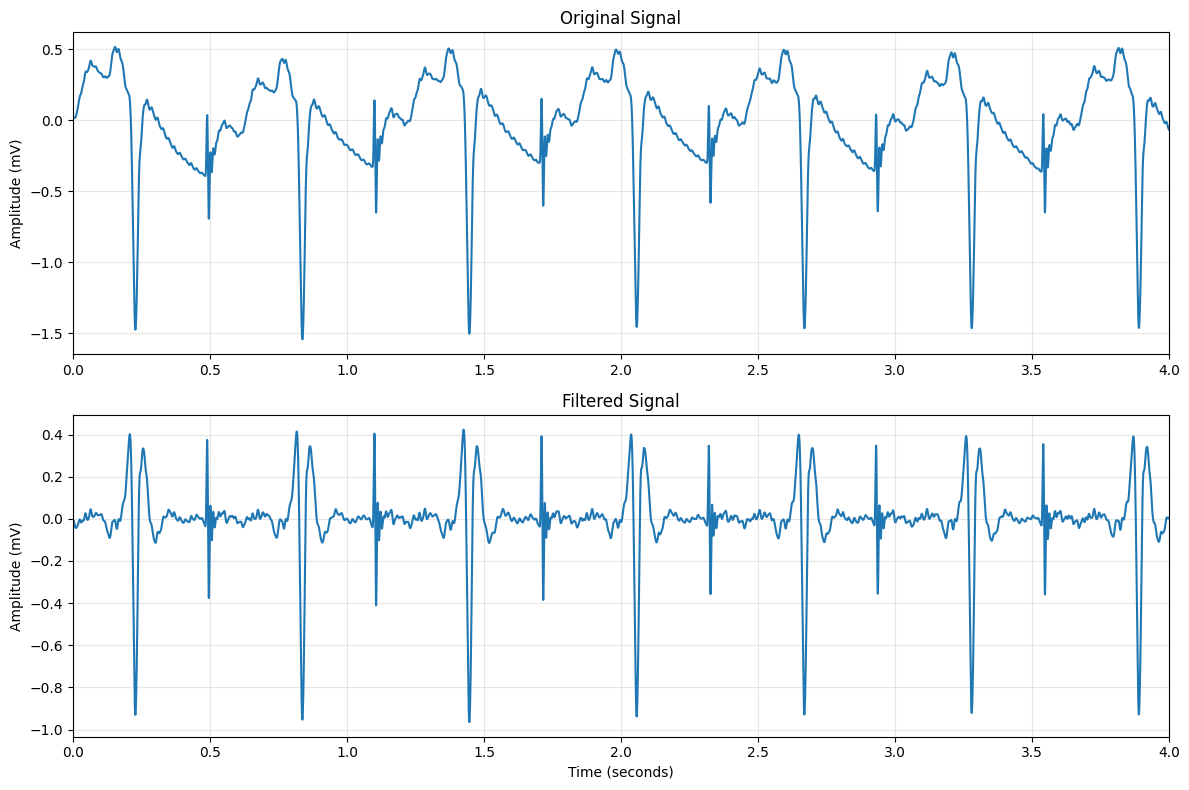

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Create time axis for 6000 samples at 2kHz sampling rate
sampling_freq = 2000  # Hz
n_samples = 8000
time_axis = np.arange(n_samples) / sampling_freq  # Convert samples to seconds

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot sinus data
ax1.plot(time_axis, sinus_dfs[sinus_key]['c1'][:n_samples])
ax1.set_title('Original Signal')
ax1.set_ylabel('Amplitude (mV)')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(np.arange(0, 4.5, 0.5))  # 0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0
ax1.set_xlim(0, 4)

# Plot patient data
ax2.plot(time_axis, filtered_sinus_dfs[sinus_key]['c1'][:n_samples])
ax2.set_title('Filtered Signal')
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel('Amplitude (mV)')
ax2.grid(True, alpha=0.3)
ax2.set_xticks(np.arange(0, 4.5, 0.5))  # 0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0
ax2.set_xlim(0, 4)

plt.tight_layout()
plt.savefig('figures/filtering_results.png')
plt.show()

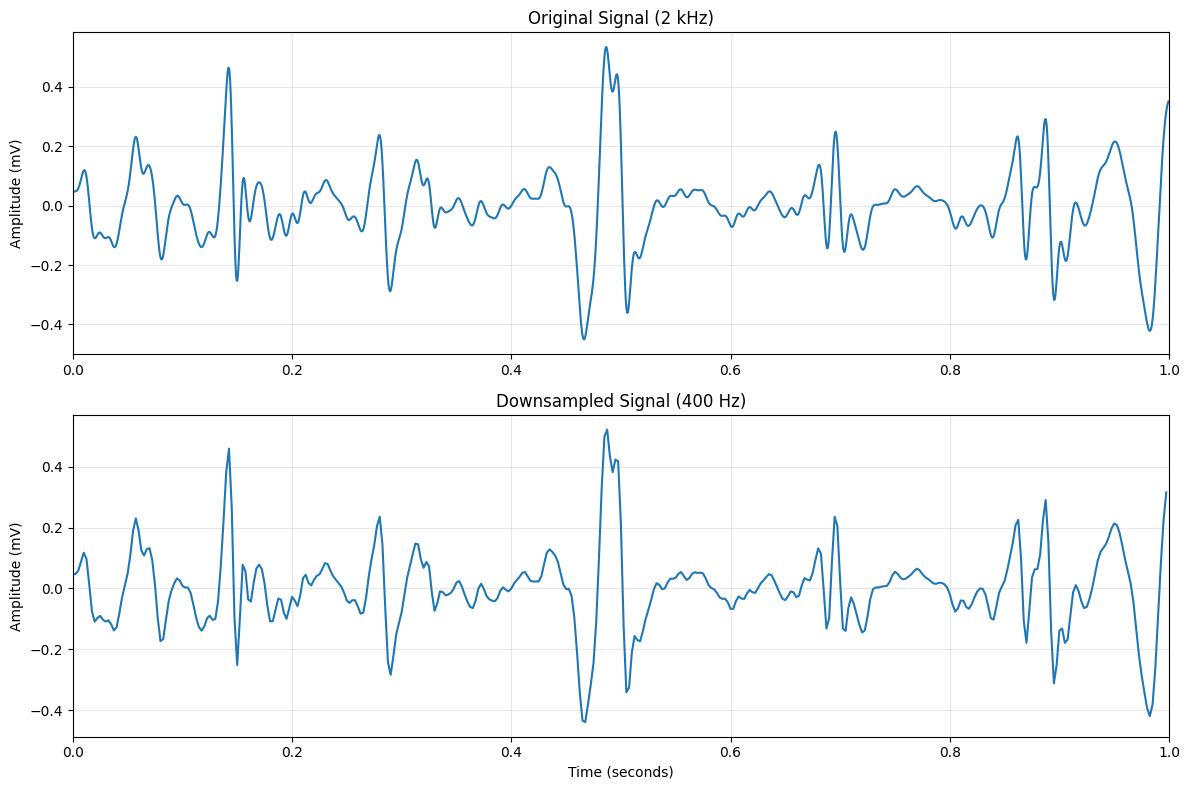

In [19]:
from src.preprocess_data import downsample_df

filtered_patient_df = filtered_patient_dfs[patient_key]
downsampled_filtered_patient_df = downsample_df(filtered_patient_df)

seconds = 1

# Original data
sampling_freq_orig = 2000  # Hz
n_samples_orig = seconds * sampling_freq_orig  # 4 seconds = 8000 samples
time_axis_orig = np.arange(n_samples_orig) / sampling_freq_orig

# Downsampled data
sampling_freq_down = 400  # Hz
n_samples_down = seconds * sampling_freq_down  # 4 seconds = 1600 samples
time_axis_down = np.arange(n_samples_down) / sampling_freq_down

# Create the plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot original signal
ax1.plot(time_axis_orig, filtered_patient_df['c1'][:n_samples_orig])
ax1.set_title('Original Signal (2 kHz)')
ax1.set_ylabel('Amplitude (mV)')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0, seconds)

# Plot downsampled signal
ax2.plot(time_axis_down, downsampled_filtered_patient_df['c1'][:n_samples_down])
ax2.set_title('Downsampled Signal (400 Hz)')
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel('Amplitude (mV)')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0, seconds)

plt.tight_layout()
plt.savefig('figures/downsampling_results.png')
plt.show()


In [20]:
sinus_df = sinus_dfs[sinus_key]

In [21]:
def normalize_dataframe(df):
    normalized_df = df.copy()
    electrode_columns = list(df.columns)[1:]
    
    for column in electrode_columns:
        normalized_df[column] = (df[column] - df[column].mean()) / df[column].std()
    
    return normalized_df

/var/folders/30/rd0_b41n6slf426c4qby8nsw0000gn/T/ipykernel_36342/3182057285.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box1 = ax1.boxplot(before_data, labels=range(1, 33))
/var/folders/30/rd0_b41n6slf426c4qby8nsw0000gn/T/ipykernel_36342/3182057285.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box2 = ax2.boxplot(after_data, labels=range(1, 33))


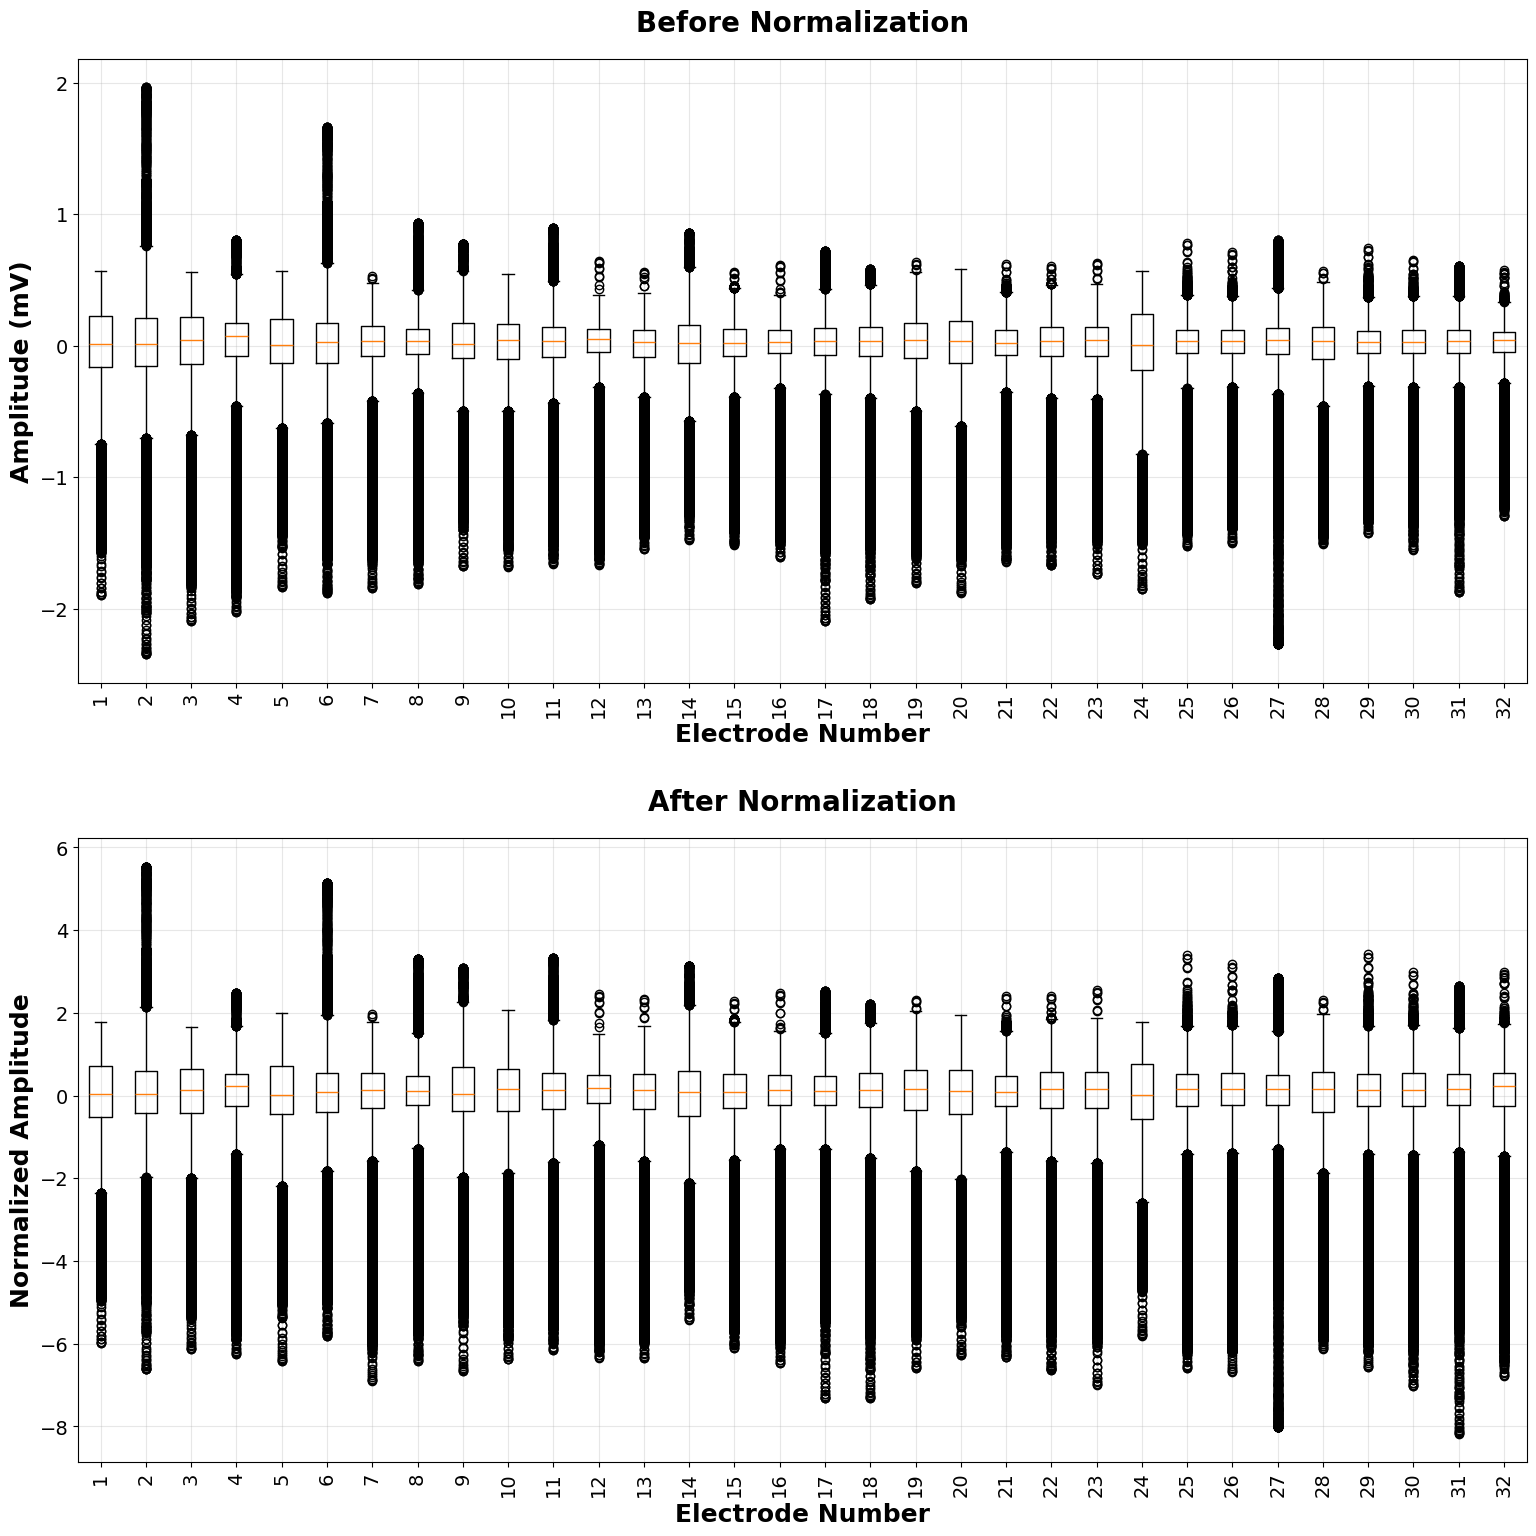

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract electrode columns
electrode_cols = [f'c{i}' for i in range(1, 33)]

# Create figure with 2x1 layout (vertical stacking)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 16))

# Plot 1: Before normalization
before_data = [sinus_df[col] for col in electrode_cols]
box1 = ax1.boxplot(before_data, labels=range(1, 33))
ax1.set_title('Before Normalization', fontsize=20, fontweight='bold', pad=20)
ax1.set_xlabel('Electrode Number', fontsize=18, fontweight='bold')
ax1.set_ylabel('Amplitude (mV)', fontsize=18, fontweight='bold')
ax1.tick_params(axis='x', rotation=90, labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax1.grid(True, alpha=0.3)

# Plot 2: After normalization
normalized_df = normalize_dataframe(sinus_df)
after_data = [normalized_df[col] for col in electrode_cols]
box2 = ax2.boxplot(after_data, labels=range(1, 33))
ax2.set_title('After Normalization', fontsize=20, fontweight='bold', pad=20)
ax2.set_xlabel('Electrode Number', fontsize=18, fontweight='bold')
ax2.set_ylabel('Normalized Amplitude', fontsize=18, fontweight='bold')
ax2.tick_params(axis='x', rotation=90, labelsize=14)
ax2.tick_params(axis='y', labelsize=14)
ax2.grid(True, alpha=0.3)

# Adjust layout with more spacing
plt.tight_layout(pad=3.0)
plt.savefig('figures/normalization_results.png', dpi=300, bbox_inches='tight')
plt.show()